In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    To export pathway order
    
RETURN
------
    {}. :  file
        
        
EXPORTED FILE(s) LOCATION
-------------------------
    .//{}/{EXPERIMENT}/{}.
'''

# importing default libraries
# import os, argparse, sys
# sys.path.append('./')
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
# importing scripts in scripts folder
from scripts import config as src
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

rand_state = 91

time_start = dt.datetime.now().time().strftime('%H:%M:%S') # = time.time() dt.datetime.now().strftime('%Y%m%d_%I%M%S%p')

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
# # giving the model path
# model_path = '../data/output/result_NN/models/signaling_log1p/design_a1_signaling.h5'

dataset              = 'Fig3g_log1p.pck'
bio_knowledge        = 'pbk_layer_hsa.txt'
experiment           = 'exper_immune'
analysis             = 'activation'
# defining biological knowledge layer based on the architecture of required model
bio_layer_number     = 1

# the output location
loc_output = os.path.join(src.DIR_REPORTS, analysis, experiment)
src.define_folder(loc_=loc_output)

FOLDER information,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/activation/exper_immune/


'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/activation/exper_immune/'

In [4]:
print('FILE FORMAT, ', dataset.split('.')[1])

if dataset.split('.')[1]=='pck':
    df_raw = pd.read_pickle(os.path.join(src.DIR_DATA_PROCESSED, experiment, dataset))
    df_raw = pd.concat([(df_raw.iloc[:, :-1]).astype(float) ,df_raw.iloc[:, -1]], axis=1)
else:
    df_raw = pd.read_csv(os.path.join(src.DIR_DATA_PROCESSED, experiment, dataset))

df_raw = df_raw[df_raw['cell_type']!='mixed'].reset_index(drop=True)
    
sort_genes = sorted(df_raw.columns[:-1])
sort_genes.extend(df_raw.columns[-1:])
df_raw = df_raw[sort_genes]

# Importing all prior biological knowledge and combine all genes to create a common gene list
list_gene = None
if (bio_knowledge!=None):
    df_bio = pd.DataFrame(pd.read_csv(os.path.join(src.DIR_DATA_PROCESSED, bio_knowledge), index_col=0)).sort_index()
    df_bio_filtered = df_bio.iloc[df_bio.index.isin(df_raw.columns), :]
    

print('Dataset cell type, ', df_raw.groupby('cell_type').size())
print('\nDataset shape             , ', df_raw.shape)
print('Biological knowledge shape, ', df_bio_filtered.shape)

print('\nDataset gene order top 10              ,', list(df_raw.columns[:10]))
print('Biological knowledge gene order top 10, ', list(df_bio_filtered.index[:10].values))

FILE FORMAT,  pck
Dataset cell type,  cell_type
B cell        1259
DC            1255
ILC            127
Macrophage    1197
Mast           130
Monocyte       865
NK            1204
Plasma B       318
T cell        3348
dtype: int64

Dataset shape             ,  (9703, 2801)
Biological knowledge shape,  (2800, 93)

Dataset gene order top 10              , ['a2m', 'abcb11', 'abcb4', 'abcc2', 'abcc8', 'abhd5', 'abi2', 'abl1', 'abl2', 'ablim1']
Biological knowledge gene order top 10,  ['a2m', 'abcb11', 'abcb4', 'abcc2', 'abcc8', 'abhd5', 'abi2', 'abl1', 'abl2', 'ablim1']


In [5]:
ohe = OneHotEncoder()
X = df_raw.iloc[:, :-1].values
y = df_raw.iloc[:, -1:].values
y_ohe = ohe.fit_transform(y).toarray()
# groups = y.reshape(1,-1)[0]

print(X.shape)
print(y.shape)
# print(groups.shape)

(9703, 2800)
(9703, 1)


In [6]:
i_design ='a1'
model, model_pbk = src.loading_model('./models/NN/exper_immune/model_'+i_design+'_'+dataset.split('.')[0]+'_train_test_split_trained.h5', bio_layer_number)
model_pbk.summary()

Loaded model!! ./models/NN/exper_immune/model_a1_Fig3g_log1p_train_test_split_trained.h5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2800)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                260493    
Total params: 260,493
Trainable params: 260,493
Non-trainable params: 0
_________________________________________________________________


In [7]:
y_pred = model_pbk.predict(X)
# creating dataframe which stores both prediction label of model and 'encode' information of given layer
df_activation_pred = pd.concat([pd.DataFrame(y_pred, columns=df_bio_filtered.columns)
                                , pd.DataFrame([ohe.categories_[0][i] for i in np.argmax(model.predict(X), axis=-1)],  columns=['cell_type']) ]
                              , axis=1)
df_activation_pred

,hsa03320,hsa04010,hsa04012,hsa04014,hsa04015,hsa04020,hsa04022,hsa04024,hsa04062,hsa04064,...,hsa04960,hsa04961,hsa04962,hsa04970,hsa04971,hsa04972,hsa04973,hsa04976,hsa05100,cell_type
0,0.000000,0.0,0.0,0.0,0.0,5.891930,6.771572,0.000000,0.0,0.0,...,0.0,0.714877,0.0,0.0,2.735190,0.0,0.0,0.0,0.0,NK
1,0.000000,0.0,0.0,0.0,0.0,4.098800,7.031027,0.000000,0.0,0.0,...,0.0,0.790714,0.0,0.0,3.726113,0.0,0.0,0.0,0.0,NK
2,0.000000,0.0,0.0,0.0,0.0,0.415654,2.886921,2.518962,0.0,0.0,...,0.0,4.750028,0.0,0.0,1.041345,0.0,0.0,0.0,0.0,T cell
3,0.000000,0.0,0.0,0.0,0.0,0.011593,2.343919,1.794888,0.0,0.0,...,0.0,3.225234,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,T cell
4,0.000000,0.0,0.0,0.0,0.0,3.247369,4.324034,0.395247,0.0,0.0,...,0.0,2.371039,0.0,0.0,1.910531,0.0,0.0,0.0,0.0,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,2.187847,0.0,0.0,0.0,0.0,0.571880,9.363680,0.000000,0.0,0.0,...,0.0,0.570733,0.0,0.0,1.543491,0.0,0.0,0.0,0.0,ILC
9699,2.113546,0.0,0.0,0.0,0.0,2.419551,7.647221,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.598280,0.0,0.0,0.0,0.0,ILC
9700,0.706924,0.0,0.0,0.0,0.0,1.631349,7.205041,0.000000,0.0,0.0,...,0.0,0.053154,0.0,0.0,1.767319,0.0,0.0,0.0,0.0,ILC
9701,1.016555,0.0,0.0,0.0,0.0,0.790260,7.696764,0.000000,0.0,0.0,...,0.0,0.176879,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ILC


## REMOVING NON-ACTIVE NODES

In [8]:
# finding non-active pathways (according to std values)
pathway_std_less_than_one = df_activation_pred.groupby('cell_type').std().sum()[df_activation_pred.groupby('cell_type').std().sum()<1].index
# printing information about non-active nodes
print('The number of non-active nodes is ', len(pathway_std_less_than_one))
print('The non-active nodes are; ')
print(pathway_std_less_than_one)

The number of non-active nodes is  49
The non-active nodes are; 
Index(['hsa04010', 'hsa04012', 'hsa04014', 'hsa04015', 'hsa04062', 'hsa04064',
       'hsa04071', 'hsa04072', 'hsa04110', 'hsa04150', 'hsa04151', 'hsa04210',
       'hsa04213', 'hsa04218', 'hsa04261', 'hsa04270', 'hsa04310', 'hsa04380',
       'hsa04510', 'hsa04530', 'hsa04540', 'hsa04610', 'hsa04611', 'hsa04621',
       'hsa04623', 'hsa04662', 'hsa04664', 'hsa04666', 'hsa04710', 'hsa04713',
       'hsa04722', 'hsa04724', 'hsa04727', 'hsa04728', 'hsa04750', 'hsa04810',
       'hsa04913', 'hsa04915', 'hsa04916', 'hsa04917', 'hsa04922', 'hsa04925',
       'hsa04960', 'hsa04962', 'hsa04970', 'hsa04972', 'hsa04973', 'hsa04976',
       'hsa05100'],
      dtype='object')


## EXPORTING ACTIVE NODES' ACTIVATION SCORE

In [9]:
# export activation scores of each pathways for each sample
df_active = df_activation_pred.iloc[:, ~df_activation_pred.columns.isin(pathway_std_less_than_one)]
df_active.to_csv(os.path.join(loc_output, 'activation_score.csv'), index=False)
df_active

,hsa03320,hsa04020,hsa04022,hsa04024,hsa04066,hsa04068,hsa04114,hsa04115,hsa04152,hsa04211,...,hsa04914,hsa04918,hsa04919,hsa04920,hsa04921,hsa04923,hsa04924,hsa04961,hsa04971,cell_type
0,0.000000,5.891930,6.771572,0.000000,6.559793,3.824965,2.770560,2.476628,1.389201,2.031622,...,5.626797,7.319040,6.547881,0.000000,0.782364,2.893259,3.421308,0.714877,2.735190,NK
1,0.000000,4.098800,7.031027,0.000000,6.542215,2.173789,1.852123,4.745402,1.359931,0.000000,...,5.418268,5.761360,4.865417,0.062092,1.379470,0.988624,1.710721,0.790714,3.726113,NK
2,0.000000,0.415654,2.886921,2.518962,8.693744,0.275003,5.682271,0.000000,3.005958,1.671145,...,6.767361,8.132132,2.320041,3.717201,0.000000,3.538870,4.706238,4.750028,1.041345,T cell
3,0.000000,0.011593,2.343919,1.794888,6.984972,0.441374,5.446021,0.474599,4.875381,1.536664,...,5.245973,6.475011,3.018075,3.720581,2.375899,3.434806,3.874408,3.225234,0.000000,T cell
4,0.000000,3.247369,4.324034,0.395247,6.848527,3.100500,3.900659,0.746438,1.542319,2.179965,...,5.236936,6.954362,3.639199,1.496365,1.226963,2.979886,3.674032,2.371039,1.910531,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,2.187847,0.571880,9.363680,0.000000,0.000000,3.483603,9.437596,4.725805,3.393397,1.083137,...,0.000000,5.706214,0.000000,2.098093,8.698604,3.721392,4.184792,0.570733,1.543491,ILC
9699,2.113546,2.419551,7.647221,0.000000,0.000000,4.404651,9.319331,4.547749,1.594512,2.528582,...,0.000000,6.644208,0.549201,0.589594,7.825790,2.978902,3.607848,0.000000,2.598280,ILC
9700,0.706924,1.631349,7.205041,0.000000,0.000000,4.265886,9.080596,3.384192,2.074439,3.338448,...,0.000000,6.676215,0.124713,1.639647,6.931653,3.198878,5.072452,0.053154,1.767319,ILC
9701,1.016555,0.790260,7.696764,0.000000,0.000000,2.863064,9.528349,2.456944,4.561427,1.728796,...,0.098614,4.398803,0.620825,2.920115,7.303251,5.330505,4.399834,0.176879,0.000000,ILC


## EXPORTING CELL TYPE - PATHWAY RELATION and CELL TYPE - FREQUENT GENE INFORMATION

In [22]:
no_of_nodes_in_pathways=6
cell_path_info = [ohe.categories_[0][x] for x in np.argmax(model.layers[2].get_weights()[0], axis=-1)]
df_cell_path_info = pd.DataFrame()
df_gene_freq = pd.DataFrame()
for i_cell in df_raw['cell_type'].unique():
    print(i_cell)
    cell_path_no = [i for i, x in enumerate(cell_path_info) if x == i_cell]
    # realted pathways with cell types
    df_temp = pd.DataFrame(df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=0), columns=['total_gene']).reset_index()
    df_temp['cell_type'] = i_cell
    df_cell_path_info = df_cell_path_info.append(df_temp)
    # the most frequent gene
    gene_freq = df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=1)[df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=1)>no_of_nodes_in_pathways].index
    df_temp = pd.DataFrame(gene_freq)
    df_temp['cell_type'] = i_cell
    df_gene_freq = df_gene_freq.append(df_temp)
    
df_cell_path_info.to_csv(os.path.join(loc_output,'pathway_cell_type_relation_fig3g.csv'), index=False)
df_gene_freq.to_csv(os.path.join(loc_output,'gene_cell_type_relation_fig3g.csv'), index=False)

NK
T cell
Monocyte
DC
B cell
Macrophage
Plasma B
Mast
ILC


## EXPORTING MOST FREQUENT GENE LIST FOR OVERALL DATASET

In [21]:
# frequent more than {len(cell type)-1} cell type
df_freq_for_cell_type = df_gene_freq['symbol'].value_counts()[df_gene_freq['symbol'].value_counts()>=len(df_raw['cell_type'].unique())-1]
# pd.DataFrame(df_freq_for_cell_type.index, columns=['gene']).to_csv(os.path.join(loc_output,'gene_most_freq_fig3g.csv'), index=False)
pd.DataFrame(df_gene_freq['symbol'].value_counts().index, columns=['gene']).to_csv(os.path.join(loc_output,'gene_most_freq_fig3g.csv'), index=False)

In [23]:
df_gene_freq['symbol'].value_counts().index

Index(['akt3', 'prkacg', 'mapk3', 'prkacb', 'akt1', 'mapk1', 'prkaca', 'akt2',
       'pik3r3', 'pik3cd', 'pik3cg', 'pik3r2', 'pik3r5', 'pik3cb', 'pik3ca',
       'pik3r1', 'prkcb', 'map2k1', 'adcy3', 'adcy8', 'hras', 'prkca', 'raf1',
       'prkcg', 'adcy1', 'map2k2', 'nras', 'kras', 'plcb3', 'adcy5', 'adcy6',
       'adcy4', 'adcy7', 'plcb1', 'gnaq', 'gnas', 'adcy9', 'plcb4', 'adcy2',
       'plcb2', 'gnb1', 'camk2a', 'mapk14', 'calml3', 'rela', 'itpr3', 'nfkb1',
       'mapk8', 'rock1', 'camk2b', 'calml6', 'gnai1', 'rac1', 'camk2g',
       'gng13', 'ppp3cb', 'mapk12', 'calm3', 'gnai3', 'rock2', 'calml5',
       'gnai2', 'mapk10', 'itpr1', 'mapk9', 'camk2d', 'mapk13', 'calm2',
       'gng7', 'itpr2', 'mapk11', 'ppp3cc', 'ppp3ca', 'rhoa', 'rac2'],
      dtype='object')

## TOP 10 ACTIVE PATHWAYS for EACH CELL TYPES

In [12]:
top_active_pathway = 15
df_freq_pathway = pd.DataFrame()
for i in range(len(df_active)):
#     cell_type_info = df_active.iloc[i, -1]
    pathway_active = pd.DataFrame(pd.DataFrame(df_active.iloc[i, :-1][df_active.iloc[i, :-1]>0]).sort_values(by=i, ascending=False)[:top_active_pathway].index
                                  , columns=['pathways'])
    pathway_active['cell_type'] = df_active.iloc[i, -1]
    df_freq_pathway = df_freq_pathway.append(pathway_active)

In [13]:
df_freq_pathway_count = pd.DataFrame(df_freq_pathway.groupby(['pathways', 'cell_type']).size(), columns=['count']).reset_index()
# df_freq_pathway_count
df_freq_pathway_pivot = df_freq_pathway_count.pivot(index='pathways',columns='cell_type', values='count').fillna(0).reset_index()


In [14]:
top_n = 10
df_freq_pathway_top_n = pd.DataFrame()
for i_ct in df_freq_pathway['cell_type'].unique():
    df_temp = df_freq_pathway_pivot[['pathways',i_ct]].sort_values(by=i_ct,ascending=False)[:top_n][['pathways']]
    df_temp['cell_type']= i_ct
    df_freq_pathway_top_n = df_freq_pathway_top_n.append(df_temp)
    
df_freq_pathway_top_n.to_csv(os.path.join(loc_output,'freq_pathways_top'+str(top_n)+'_fig3g.csv'), index=False)

In [15]:
len(df_freq_pathway_top_n)

90

## PLOT DISTRIBUTION of PATHWAYS ACTIVITIES

In [185]:
!pwd

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

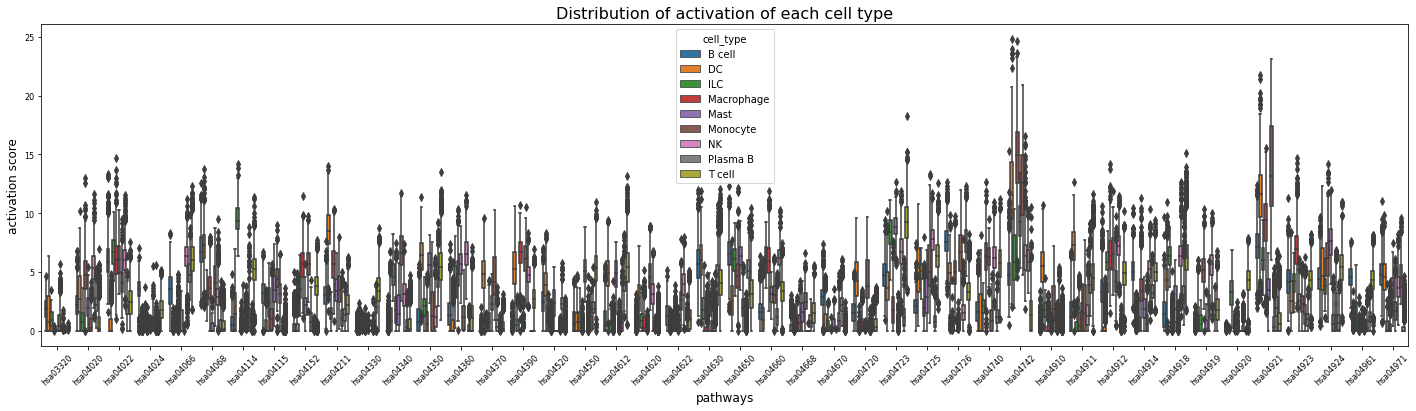

In [17]:
# to visualize the distribution for each pathway, pd.melt operation applied into df_plot dataset
# visualization of the activities of all pathway according to cell_type
order_train = sorted(list(set(df_raw['cell_type'].values)))
plt.figure(figsize=(20,6))
sns.boxplot(x='variable', y='value', data=pd.melt(df_active, id_vars='cell_type'), hue='cell_type', hue_order=dict(zip(order_train, range(len(order_train)))))
plt.xticks(rotation=45);
plt.title('Distribution of activation of each cell type')
plt.xlabel('pathways')
plt.ylabel('activation score')
plt.tight_layout()
# exporting the graph
plt.savefig(os.path.join(loc_output, 'distribution_activities_fig3g.png'), dpi=300, bbox_inches = 'tight')